<a href="https://colab.research.google.com/github/AngelJmzIsd/Iris/blob/main/Actividad_4__EvaluacionDeModelosDeClasificacion_Hongos_A01659898.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. IMPORTAR ARCHIVOS Y LIBRERIAS

In [ ]:
import matplotlib.pyplot as plt
#import seaborn as sns
#import re

%matplotlib inline
#sns.set()
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
hongos = pd.read_csv('/content/gdrive/MyDrive/4TO SEMESTRE/ANALISIS DE CIENCIA DE DATOS/Hongos/mushrooms.csv')

from sklearn import datasets
from sklearn.preprocessing import label_binarize

Mounted at /content/gdrive


# **CREACIÓN DE LAS DUMMIE VARIABLES**


**COLUMNA OBJETIVO**

La columna objetivo o target es en este caso class, sin embargo será necesario convertirla a una columna con valores binarios. Así mismo, las demás columnas deberán ser convertidas a datos numéricos para poder trabajar con ellos.

In [ ]:
#COPIAR EL DATAFRAME PARA SUSTITUIR LOS VALORES SIN MODIFICAR EL DATAFRAME ORIGINAL
'''
e = edible = 1
p = poisonous = 0

'''
df=hongos.copy()
df['class'] = np.where(df['class'] == 'e', 1, 0)

**COLUMNAS PREDICTORAS - FEATURES**

In [ ]:
#Aqui se define un nuevo dataframe con todas las columnas del dataframe original
#a excepcion de class, la cual se elimina pues es la variable objetivo.
predictors=df.drop(['class'],axis=1)

In [ ]:
#HACERLAS DUMMIES, EN CADA COLUMNA POR SEPARADO, 1 o 0
dummyPredictors = pd.get_dummies(predictors)

In [ ]:
dummyPredictors.shape

(8124, 117)

IMPORTAR ARCHIVOS Y LIBRERIAS

In [ ]:
#IMPORTAR EL MODULO IRIS
from google.colab import files
!cp /content/gdrive/MyDrive/ProyectoLibreria/iris.py /content

#Se importa la clase Setosa, para entrenar y evaluar los modelos
from iris import Setosa

In [ ]:
#SE CREA UN OBJETO DE LA CLASE SETOSA, QUE FUNCIONA COMO EVALUADOR
#Se ingresan las columnas predictoras y la columna objetivo

Eva = Setosa(dummyPredictors,df['class'])

In [ ]:
#DIVIDIR LOS DATOS EN CONJUNTO DE ENTRNAMIENTO Y DE PRUEBA
#Se usa un test size de 0.3
Eva.generarSetsTrainTest(0.3,0)

# **ENTRENAMIENTO DE MODELOS**

In [ ]:
#El arbol se entrena con un random state = 0
#y una profundidad maxima de 1
#para que las graficas puedan apreciasrse con mas
#variaciones
Eva.entrenarArbol(0,1)

In [ ]:
Eva.entrenarRegresionLogistica()

In [ ]:
Eva.entrenarSVM()

# **EVALUACIÓN DE LOS MODELOS**

In [ ]:
Eva.printReporteInd("arbol")

<<<    REPORTE INDIVIDUAL DEL MODELO:  Arbol de decisiones  >>>> 

Accuracy:  0.8798195242001641
Precision:  0.968421052631579
Recall (sensibilidad):  0.7955974842767296
Especificidad:  0.9716981132075472
F1:  0.8735433750539491


In [ ]:
Eva.printReporteInd("logreg")

<<<    REPORTE INDIVIDUAL DEL MODELO:  Regresion Logistica  >>>> 

Accuracy:  1.0
Precision:  1.0
Recall (sensibilidad):  1.0
Especificidad:  1.0
F1:  1.0


In [ ]:
Eva.printReporteInd("svm")

<<<    REPORTE INDIVIDUAL DEL MODELO:  Support Vector Machine  >>>> 

Accuracy:  1.0
Precision:  1.0
Recall (sensibilidad):  1.0
Especificidad:  1.0
F1:  1.0


# **MATRICES DE CONFUSION**

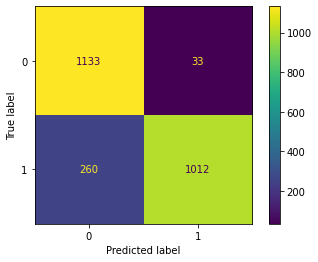

<Figure size 432x288 with 0 Axes>

In [ ]:
#Amtria del modelo de arbol
Eva.mostrarMatrizConfusion("arbol")

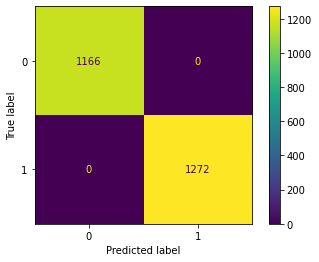

<Figure size 432x288 with 0 Axes>

In [ ]:
Eva.mostrarMatrizConfusion("logreg")

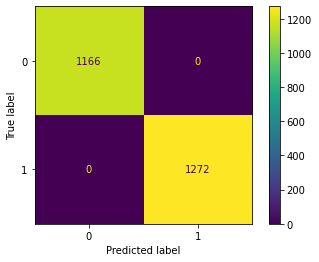

<Figure size 432x288 with 0 Axes>

In [ ]:
Eva.mostrarMatrizConfusion("svm")

# **GRAFICAS DE CURVA ROC Y AUC**

En las mismas gráficas se encuentra el valor de la AUC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


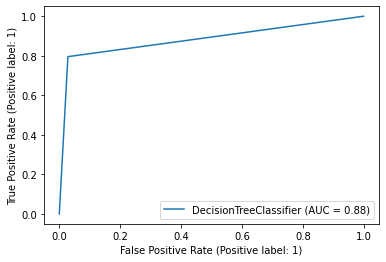

<Figure size 432x288 with 0 Axes>

In [ ]:
Eva.mostrarCurvaROC("arbol")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


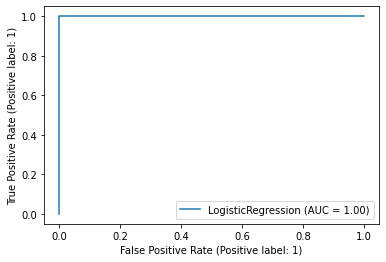

<Figure size 432x288 with 0 Axes>

In [ ]:
Eva.mostrarCurvaROC("logreg")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


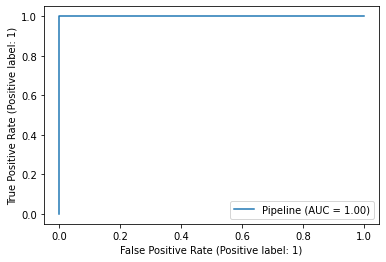

<Figure size 432x288 with 0 Axes>

In [ ]:
Eva.mostrarCurvaROC("svm")